In [1]:

# Importing naumpy and pandas libraries to read the data

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
df_model = pd.read_csv("ifood_df.csv")
df_model


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [2]:
df_model.shape

(2205, 39)

In [3]:
df_model.info

<bound method DataFrame.info of        Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   
4     58293.0        1         0       94       173         43   
...       ...      ...       ...      ...       ...        ...   
2200  61223.0        0         1       46       709         43   
2201  64014.0        2         1       56       406          0   
2202  56981.0        0         0       91       908         48   
2203  69245.0        0         1        8       428         30   
2204  52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                

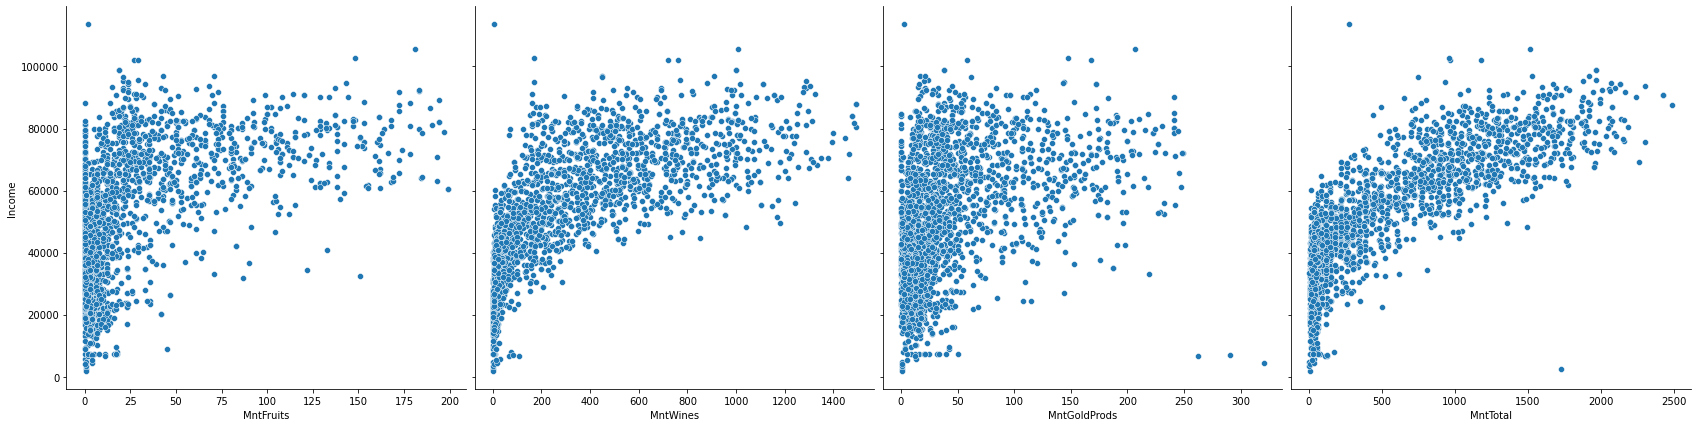

In [4]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data=df_model, x_vars=['MntFruits', 'MntWines','MntGoldProds', 'MntTotal'], 
             y_vars='Income', height=6, aspect=1, kind='scatter')
plt.show()



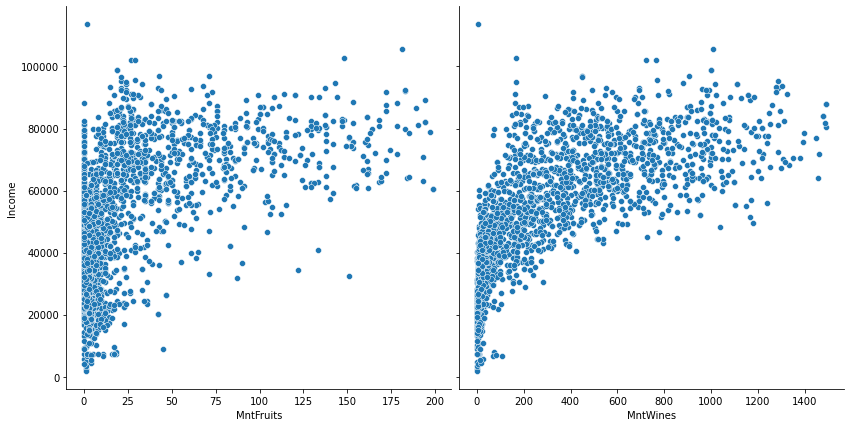

In [5]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data=df_model, x_vars=['MntFruits', 'MntWines'], 
             y_vars='Income', height=6, aspect=1, kind='scatter')
plt.show()



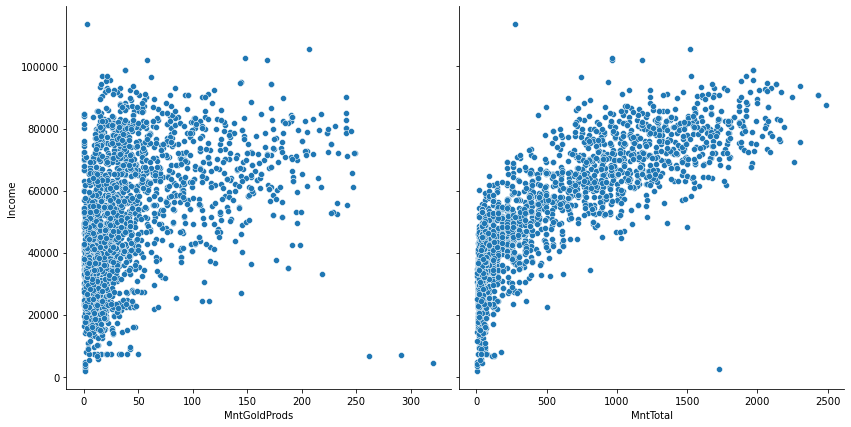

In [6]:

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(data=df_model, x_vars=['MntGoldProds', 'MntTotal'], 
             y_vars='Income', height=6, aspect=1, kind='scatter')
plt.show()



In [7]:

# Creating X and y
X = df_model['Recency']
y = df_model['MntTotal']



In [8]:

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)



In [9]:

# Take a look at the train dataset
X_train
y_train



1991     34
1483    908
726      31
1558     63
261     763
       ... 
350      42
1930     19
79       53
1859    438
1544    953
Name: MntTotal, Length: 1543, dtype: int64

In [10]:

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


const      527.011303
Recency      0.999849
dtype: float64

In [12]:

# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MntTotal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.932
Date:                Mon, 30 May 2022   Prob (F-statistic):             0.0475
Time:                        12:20:34   Log-Likelihood:                -12002.
No. Observations:                1543   AIC:                         2.401e+04
Df Residuals:                    1541   BIC:                         2.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        527.0113     28.762     18.323      0.000     470.595     583.428
Recency        0.9998      0.504      1.983      0.048       0.011       1.989
==============================================================================
Omnibus:                      156.643   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.259
Skew:                           0.870   Prob(JB):                     3.27e-44
Kurtosis:                       2.702   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

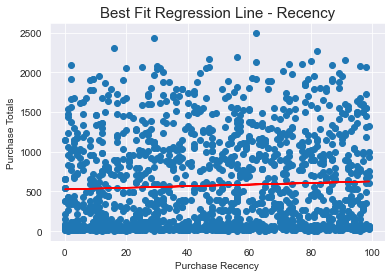

In [21]:

# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 527.011 + 0.9998*X_train, 'r')
plt.title('Best Fit Regression Line - Recency', fontsize = 15)
plt.xlabel('Purchase Recency')
plt.ylabel('Purchase Totals')
plt.show()



In [14]:

# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


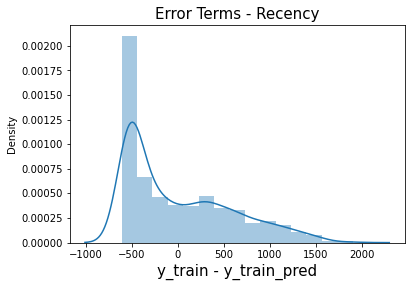

In [15]:

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms - Recency', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()



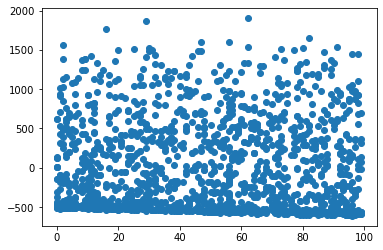

In [16]:

# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()


In [17]:

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


2114    560.006310
599     620.997081
2118    531.010697
1309    610.998594
670     624.996476
           ...    
101     573.004343
365     541.009185
592     610.998594
2193    613.998140
154     554.007218
Length: 662, dtype: float64

In [18]:

# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared



-0.013565289737351494

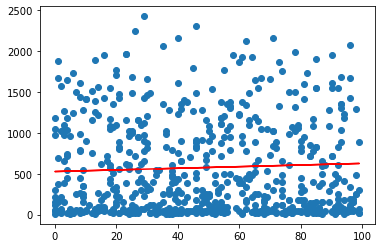

In [19]:

# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

